# Modelos de Aprendizado de Máquina
Neste notebook tem os seguintes modelos de aprendizado de máquina comparados:
- Floresta Aleatória
- SVM

## **Prepare Environment**

<br/>

### Imports

In [1]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import os

<br/>

### Set Config

In [2]:
%matplotlib inline

# Carrega a extensão "autoreload" para que o código possa mudar
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500,
    'figure.autolayout': True,
    'figure.figsize': [17, 12],
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'font.size': 10,
    'lines.linewidth': 1.0,
    'lines.markersize': 8,
    'legend.fontsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15}

sns.set_context("paper")  # Definindo o contexto para "paper"
sns.set_theme(style='darkgrid',
    palette='deep',
    color_codes=True,
    rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Suprima avisos desnecessários para que a apresentação pareça limpa
warnings.filterwarnings('ignore')

In [3]:
# plt.style.use('seaborn')  # fivethirtyeight - Removido
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set_theme(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set_theme(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

<br/>

### Load Data

In [13]:
%%time

df_soja = pd.read_csv(r'C:\Users\Lucas S\OneDrive\Documents\ADM_UFPB\TCC1\db_soja_modificado\db_pré-processado_02.csv',
                        encoding='utf8',
                        delimiter=',',
                        parse_dates=True,
                        index_col=0,
                        verbose=True)

Tokenization took: 22.73 ms
Type conversion took: 15.43 ms
Parser memory cleanup took: 0.00 ms
CPU times: total: 62.5 ms
Wall time: 82.2 ms


In [14]:
print(df_soja.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6410 entries, 2006-04-27 to 2023-11-13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   preco         6410 non-null   float64
 1   residuos      6410 non-null   float64
 2   tendencia     6410 non-null   float64
 3   sazonalidade  6410 non-null   float64
 4   diff_1        6410 non-null   float64
 5   diff_2        6410 non-null   float64
 6   diff_3        6410 non-null   float64
 7   diff_4        6410 non-null   float64
 8   diff_5        6410 non-null   float64
dtypes: float64(9)
memory usage: 500.8 KB
None


In [15]:
df_soja.head()

,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2006-04-27,27.15,-1.38,28.06,0.47,-0.17,-0.29,-0.18,-0.11,-0.03
2006-04-28,27.67,-0.77,28.08,0.35,0.52,0.35,0.23,0.34,0.41
2006-04-29,27.65,-0.81,28.11,0.35,-0.02,0.50,0.33,0.21,0.32
2006-04-30,27.63,-0.75,28.14,0.23,-0.02,-0.04,0.48,0.31,0.19
2006-05-01,27.61,-0.88,28.18,0.31,-0.02,-0.04,-0.06,0.46,0.29


---

## **Split Data**

In [16]:
# Definir a série temporal
ts = df_soja

# Dividir os dados em treinamento e teste
size_train = int(len(ts) * 0.8)
df_train, df_test = ts[0:size_train], ts[size_train:len(ts)]
size_test = len(df_test)

print('Observations: %d' % (len(ts)))
print('Training Observations: %d' % (len(df_train)))
print('Testing Observations: %d' % (len(df_test)))

Observations: 6410
Training Observations: 5128
Testing Observations: 1282


In [17]:
df_soja_without_target = df_train.columns
df_soja_without_target = df_soja_without_target.drop('preco')

print(df_soja_without_target)

Index(['residuos', 'tendencia', 'sazonalidade', 'diff_1', 'diff_2', 'diff_3',
       'diff_4', 'diff_5'],
      dtype='object')


Text(0.5, 1.0, 'Train size: 5128')

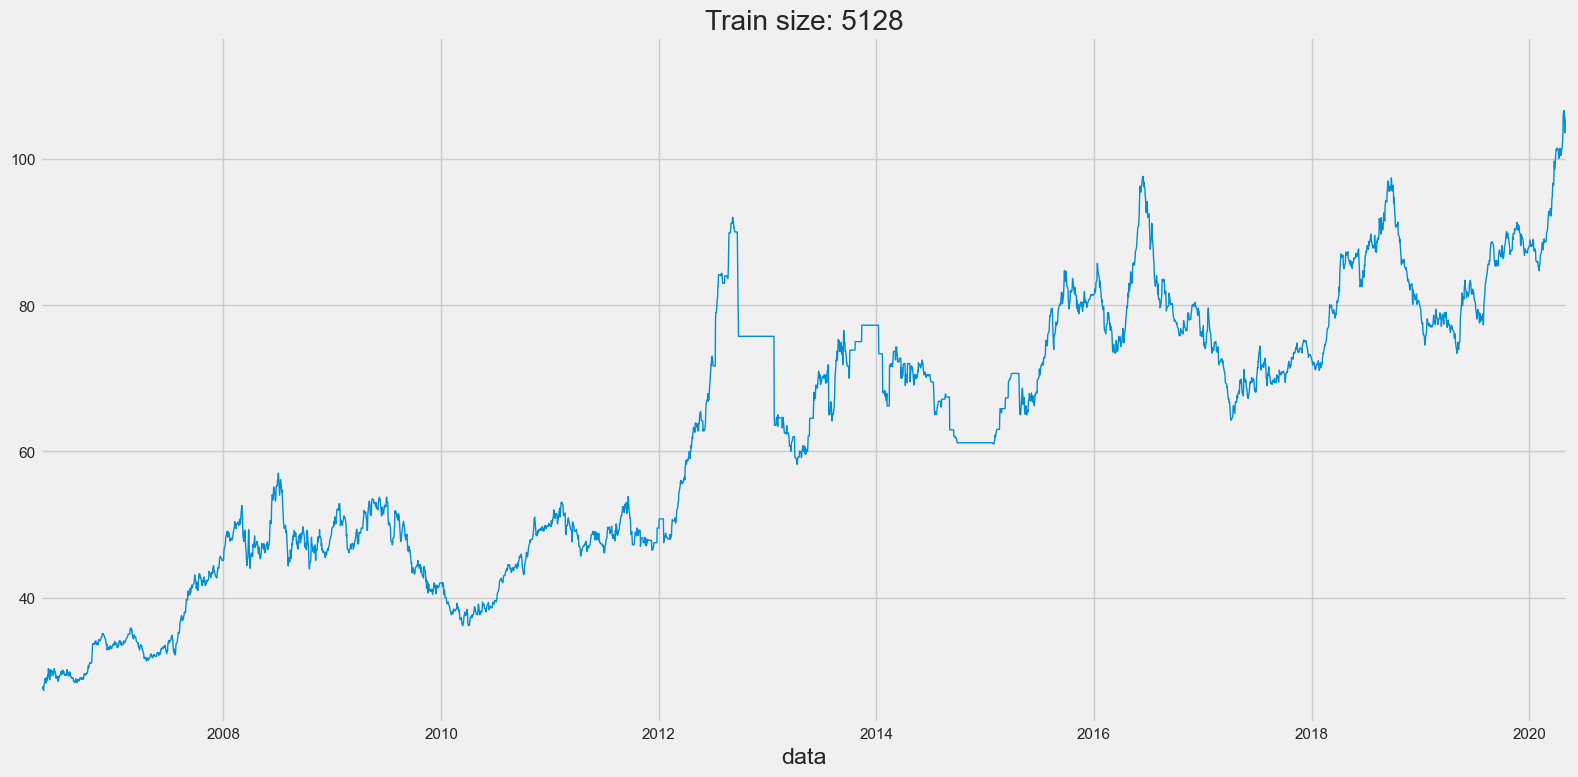

In [18]:
df_train['preco'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Train size: {len(df_train)}')

Text(0.5, 1.0, 'Test size: 1282')

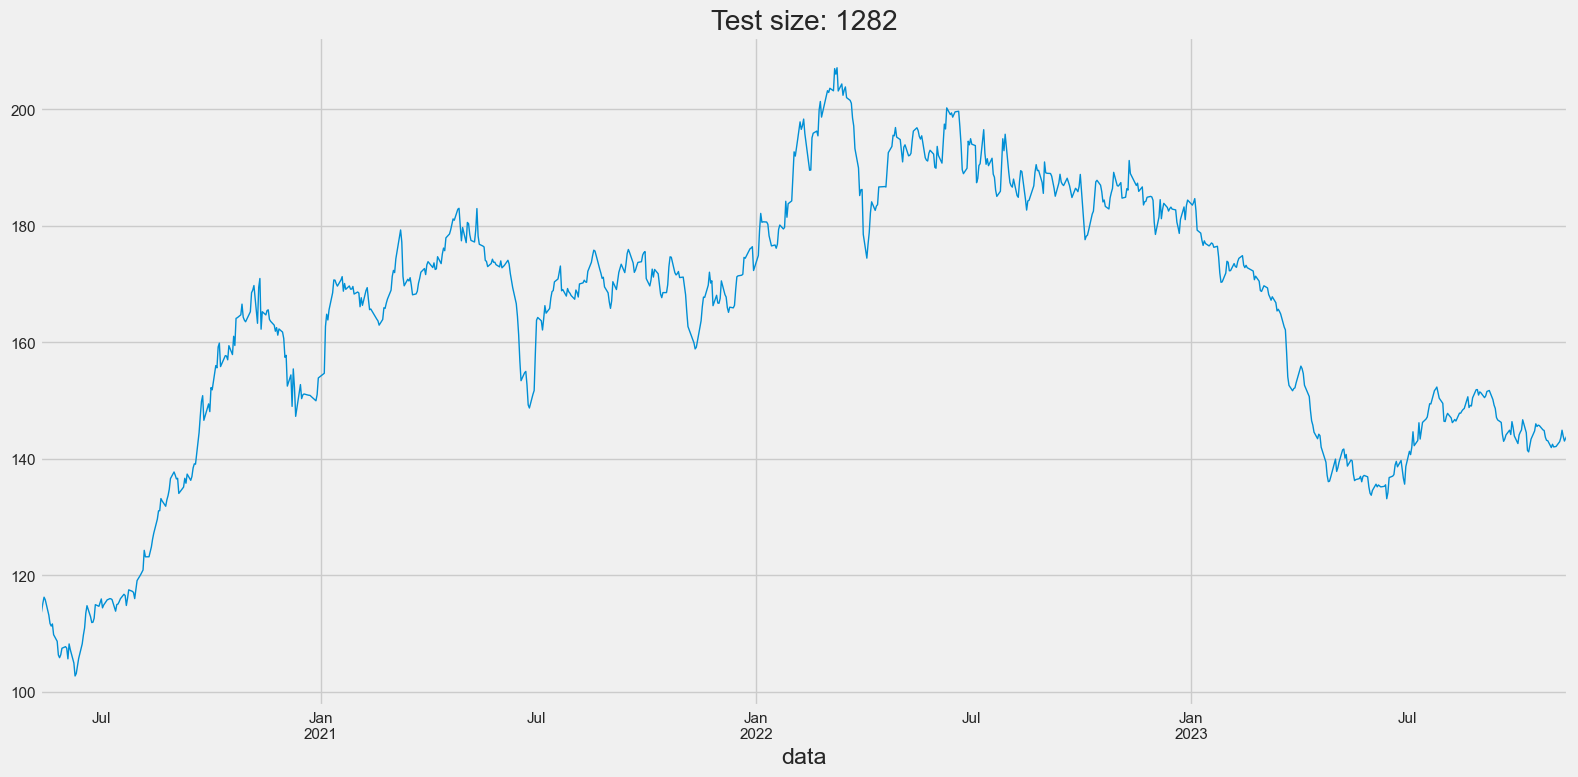

In [19]:
df_test['preco'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Test size: {len(df_test)}')

In [20]:
df_train.index

DatetimeIndex(['2006-04-27', '2006-04-28', '2006-04-29', '2006-04-30',
               '2006-05-01', '2006-05-02', '2006-05-03', '2006-05-04',
               '2006-05-05', '2006-05-06',
               ...
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10'],
              dtype='datetime64[ns]', name='data', length=5128, freq=None)

In [21]:
df_test.index

DatetimeIndex(['2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20',
               ...
               '2023-11-04', '2023-11-05', '2023-11-06', '2023-11-07',
               '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11',
               '2023-11-12', '2023-11-13'],
              dtype='datetime64[ns]', name='data', length=1282, freq=None)

In [23]:
X_train = df_train[df_soja_without_target]
y_train = df_train['preco']
print(len(X_train))
print(len(y_train))
print(type(X_train))
print(type(y_train))
print((X_train[:5]))
print(y_train[:5])


X_train = df_train[df_soja_without_target]
y_train = df_train['preco']

5128
5128
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residuos  tendencia  sazonalidade  diff_1  diff_2  diff_3  diff_4  \
data                                                                            
2006-04-27     -1.38      28.06          0.47   -0.17   -0.29   -0.18   -0.11   
2006-04-28     -0.77      28.08          0.35    0.52    0.35    0.23    0.34   
2006-04-29     -0.81      28.11          0.35   -0.02    0.50    0.33    0.21   
2006-04-30     -0.75      28.14          0.23   -0.02   -0.04    0.48    0.31   
2006-05-01     -0.88      28.18          0.31   -0.02   -0.04   -0.06    0.46   

            diff_5  
data                
2006-04-27   -0.03  
2006-04-28    0.41  
2006-04-29    0.32  
2006-04-30    0.19  
2006-05-01    0.29  
data
2006-04-27   27.15
2006-04-28   27.67
2006-04-29   27.65
2006-04-30   27.63
2006-05-01   27.61
Name: preco, dtype: float64


In [24]:
X_test = df_test[df_soja_without_target]
y_test = df_test['preco']
print(len(X_test))
print(len(y_test))
print(type(X_test))
print(type(y_test))
print(X_test[:5])
print(y_test[:5])

1282
1282
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residuos  tendencia  sazonalidade  diff_1  diff_2  diff_3  diff_4  \
data                                                                            
2020-05-11      5.75     106.56          0.53    0.47    0.95    1.42    2.20   
2020-05-12      6.74     106.72          0.49    1.11    1.58    2.06    2.53   
2020-05-13      7.91     106.89          0.47    1.32    2.43    2.90    3.38   
2020-05-14      8.86     107.05          0.35    1.00    2.32    3.43    3.90   
2020-05-15      8.28     107.20          0.35   -0.44    0.56    1.88    2.99   

            diff_5  
data                
2020-05-11    4.98  
2020-05-12    3.31  
2020-05-13    3.85  
2020-05-14    4.38  
2020-05-15    3.46  
data
2020-05-11   112.84
2020-05-12   113.95
2020-05-13   115.27
2020-05-14   116.27
2020-05-15   115.83
Name: preco, dtype: float64


---

---

## **Evaluation**

In [25]:
dict_results = {}

<br/>

### Display Results

In [26]:
def show_result_model(df_train, df_test, y_forecast, model_name):
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['previsao'])
    mape = mean_absolute_percentage_error(df_test, y_forecast)*100
    mse = mean_squared_error(df_test, y_forecast, squared=True)
    dict_results[model_name] = [mape, mse]
    
    pd.concat([df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Tempo (dias)", fontsize=20)
    plt.ylabel("Preço (R$)", fontsize=20)
    plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)

---

## **Modeling**

<br/>

### **Build Model**

#### **Random Forest**

In [30]:
# RandomForest params dict
rf_params_one = {}
rf_params_one['criterion'] = 'squared_error'  # substituir 'mse' por 'squared_error'
rf_params_one['n_estimators'] = 10
rf_params_one['max_depth'] = 5
rf_params_one['max_features'] = None
rf_params_one['max_leaf_nodes'] = 15
rf_params_one['min_samples_leaf'] = 1
rf_params_one['random_state'] = 0
rf_params_one['n_jobs'] = -1 # run all process

In [31]:
model_rf_regressor = RandomForestRegressor(**rf_params_one)
model_rf_regressor

RandomForestRegressor(max_depth=5, max_features=None, max_leaf_nodes=15,
                      n_estimators=10, n_jobs=-1, random_state=0)

In [32]:
model_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=None, max_leaf_nodes=15,
                      n_estimators=10, n_jobs=-1, random_state=0)

In [33]:
y_pred_rf_regressor = model_rf_regressor.predict(X_test)
y_pred_rf_regressor[:5]

array([102.96892513, 102.96892513, 102.96892513, 102.96892513,
       102.96892513])

In [34]:
len(y_train)

5128

In [35]:
len(y_test)

1282

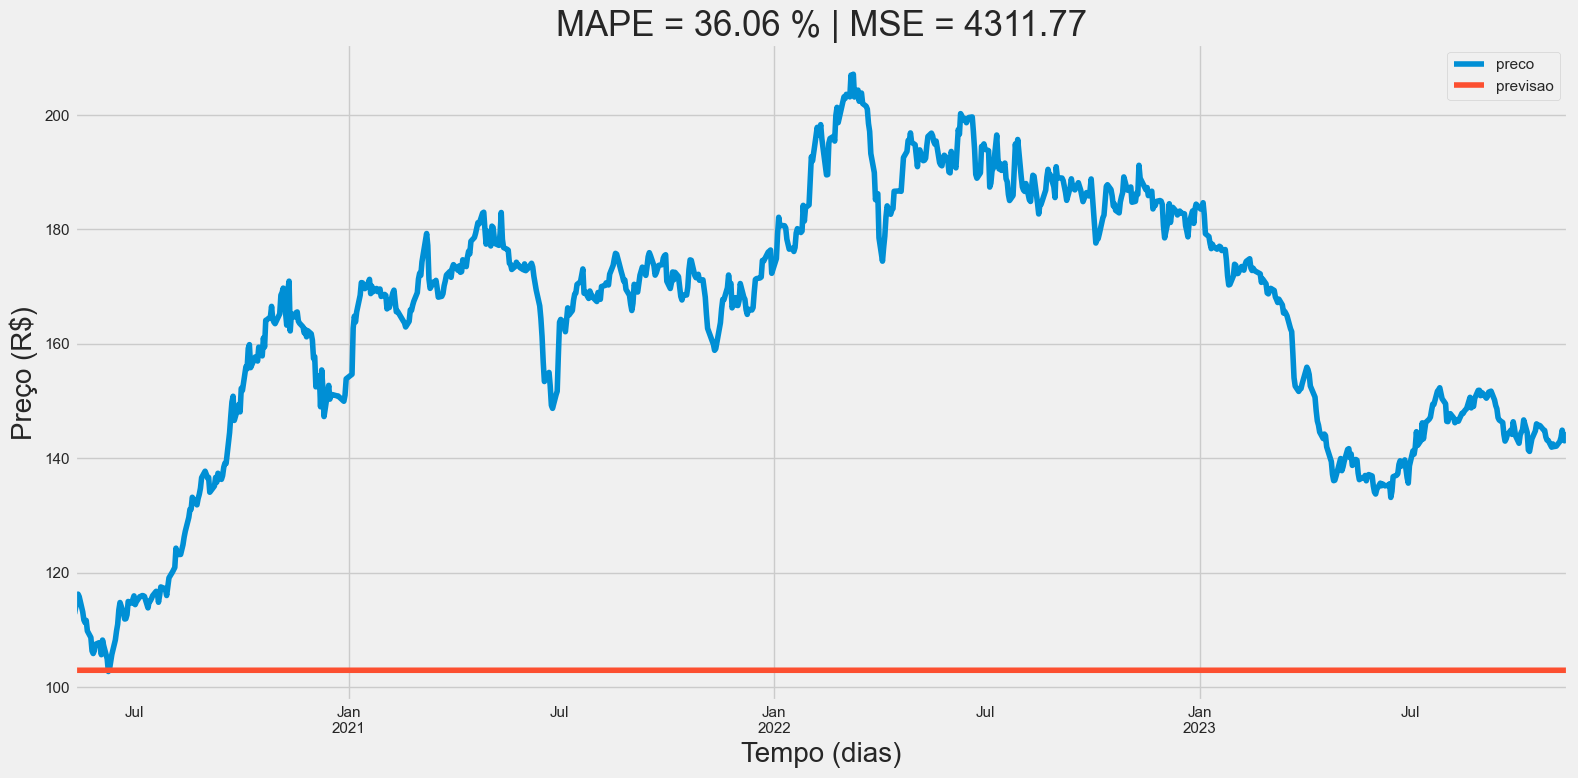

In [36]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_rf_regressor,
                  model_name='model_rf_regressor')

---

<br/>

#### **SVM**
- Doc sobre gamma: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
- Gamma é quem controla o learning rate

In [61]:
model_svm_regressor = SVR(kernel='rbf', gamma= 0.1) # kernel='rbf', gamma= 0.1 | kernel='poly', degree=1
model_svm_regressor

SVR(gamma=0.1)

In [62]:
model_svm_regressor.fit(X_train, y_train)

SVR(gamma=0.1)

In [63]:
y_pred_svm_regressor = model_svm_regressor.predict(X_test)
y_pred_svm_regressor[:5]

array([68.94545259, 68.43705989, 68.33247627, 68.23827064, 68.16077743])

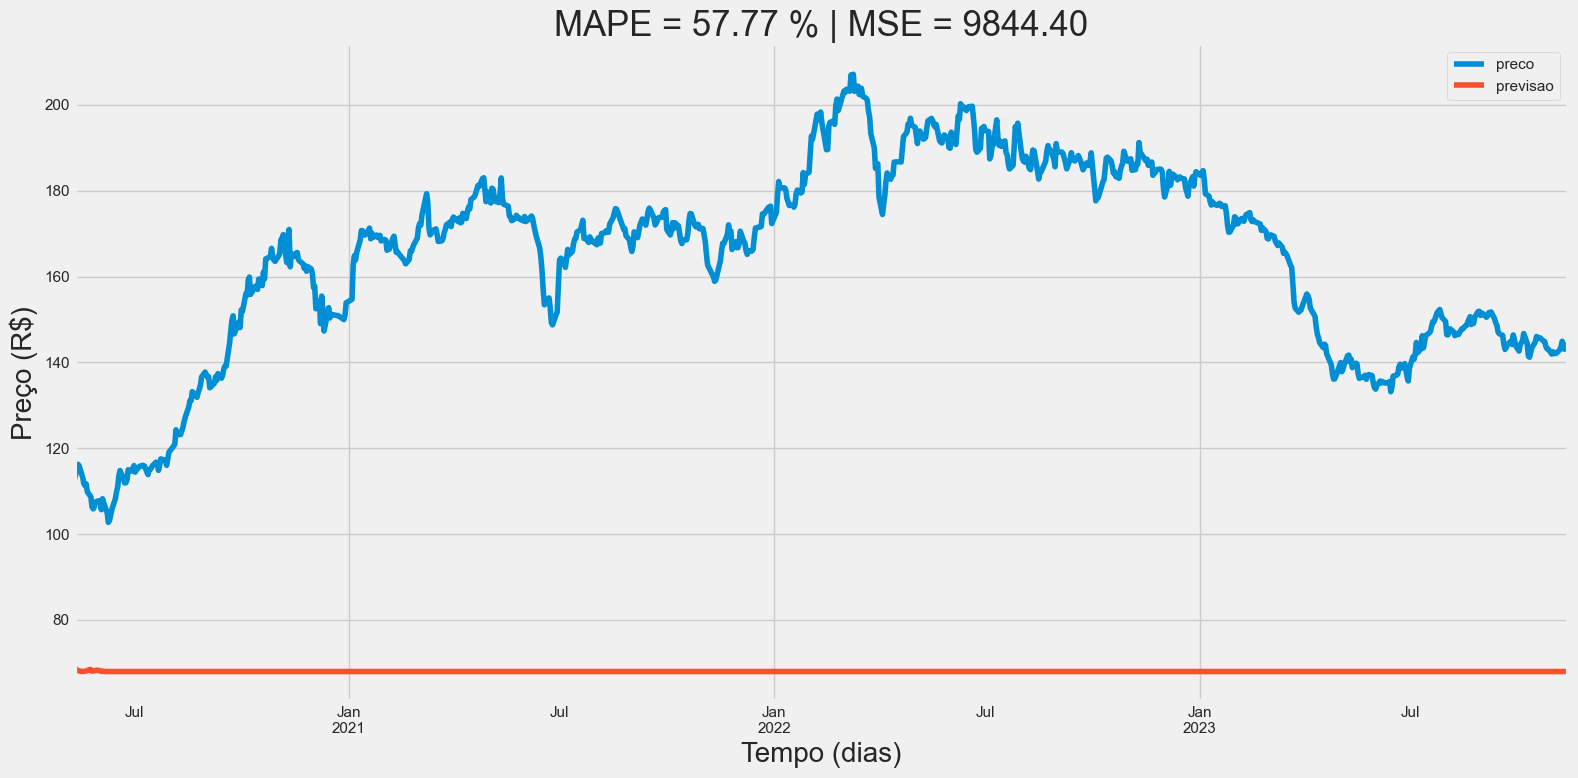

In [64]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_svm_regressor,
                  model_name='model_svm_regressor')

---

## **Results**

In [41]:
dict_results

{'model_rf_regressor': [36.06277469817352, 4311.771747838509],
 'model_svm_regressor': [57.77326580648082, 9844.39908034336]}

---